# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
url = "https://raw.githubusercontent.com/juancarlosvw/DATAMINING/refs/heads/main/penguins_size.csv"
dataset = pd.read_csv(url,sep=',')
#dataset.sample(n=10)
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [4]:
dataset.describe()
#showing mean,std,min and more from each column

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
print(dataset.value_counts('species'))
print(dataset.value_counts('island'))
print(dataset.value_counts('sex',dropna=False))


species
Adelie       152
Gentoo       124
Chinstrap     68
dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
dtype: int64


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Drop the null column(s)

In [6]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [7]:
row_336 = dataset.loc[336]
row_336


species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                       .
Name: 336, dtype: object

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [10]:
summary_stats = dataset.groupby('sex').describe()

columns_to_show = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
grouped_stats = dataset.groupby('sex')[columns_to_show].describe()

grouped_stats

culmen_length_mm                                                   \
                  count       mean       std   min     25%   50%     75%   
sex                                                                        
.                   1.0  44.500000       NaN  44.5  44.500  44.5  44.500   
FEMALE            165.0  42.096970  4.903476  32.1  37.600  42.8  46.200   
MALE              168.0  45.854762  5.366896  34.6  40.975  46.8  50.325   

             culmen_depth_mm             ... flipper_length_mm         \
         max           count       mean  ...               75%    max   
sex                                      ...                            
.       44.5             1.0  15.700000  ...             217.0  217.0   
FEMALE  58.0           165.0  16.425455  ...             210.0  222.0   
MALE    59.6           168.0  17.891071  ...             219.0  231.0   

       body_mass_g                                                           \
             count         mean         std     min     25%     50%     75%   
sex                                                                           
.              1.0  4875.000000         NaN  4875.0  4875.0  4875.0  4875.0   
FEMALE       165.0  3862.272727  666.172050  2700.0  3350.0  3650.0  4550.0   
MALE         168.0  4545.684524  787.628884  3250.0  3900.0  4300.0  5312.5   

                
           max  
sex             
.       4875.0  
FEMALE  5200.0  
MALE    6300.0  

[3 rows x 32 columns]

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [20]:
gentoo_data = dataset[dataset['species'] == 'Gentoo']

gentoo_stats = gentoo_data.groupby('sex').describe()


print(gentoo_stats)


penguin_336 = dataset.loc[336]


dataset.loc[(dataset['species'] == 'Gentoo') & (dataset['sex'] == '.') & 
            (dataset['flipper_length_mm'] <= 217.0) & 
            (dataset['body_mass_g'] <= 4875.0), 'sex'] = 'FEMALE'

penguin_336 = dataset.loc[336, ['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

print(penguin_336)

       culmen_length_mm                                                      \
                  count       mean       std   min   25%   50%    75%   max   
sex                                                                           
FEMALE             59.0  45.545763  2.038197  40.9  43.9  45.5  46.85  50.5   
MALE               61.0  49.473770  2.720594  44.4  48.1  49.5  50.50  59.6   

       culmen_depth_mm             ... flipper_length_mm        body_mass_g  \
                 count       mean  ...               75%    max       count   
sex                                ...                                        
FEMALE            59.0  14.262712  ...             215.5  222.0        59.0   
MALE              61.0  15.718033  ...             225.0  231.0        61.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
sex                                                         

,336
species,Gentoo
island,Biscoe
culmen_length_mm,44.5
culmen_depth_mm,15.7
flipper_length_mm,217.0
body_mass_g,4875.0
sex,FEMALE


7. Create your own insightful visualization and explain it in at least 2 sentences

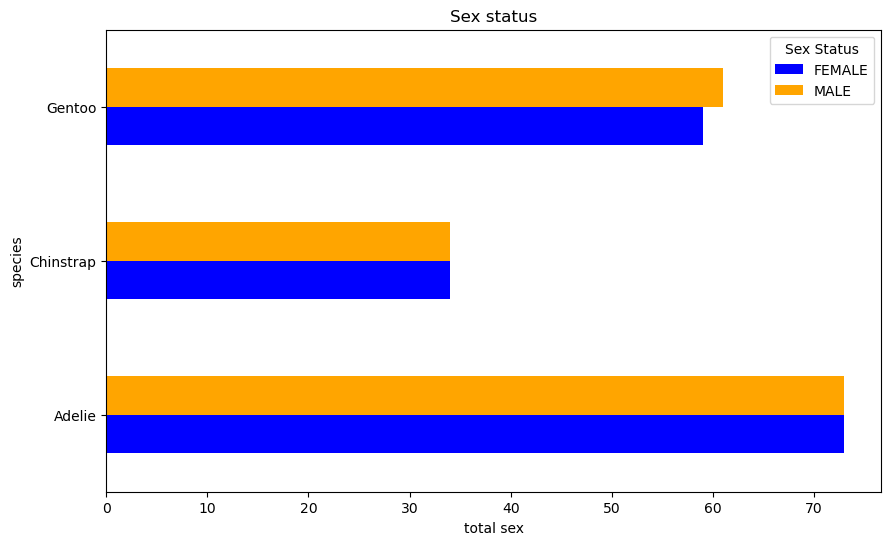

In [21]:
# Group data by major and admission status, then count occurrences
admission_major = dataset.groupby(['species', 'sex']).size().unstack()

# Create a horizontal bar chart
admission_major.plot(kind='barh', stacked=False, color=['blue', 'orange', 'green'], figsize=(10, 6))

# Customize the chart
plt.title('Sex status')
plt.xlabel('total sex')
plt.ylabel('species')
plt.legend(title='Sex Status')

# Show the chart
plt.show()

#this visualization shows each species sex. showed that adelie have the most female and male.

8. Check unique value of our target variable

In [22]:
for column in ['species']:
    print(dataset[column].unique())


['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [23]:
island_n = {'Dream': 1,'Torgersen':2,'Biscoe':3}
sex_n = {'MALE':1,'FEMALE':0}

dataset['island'] = dataset['island'].map(island_n)
dataset['sex'] = dataset['sex'].map(sex_n)
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


10. encode the target column and display the results

In [24]:
species_n = {'Adelie':0,'Chinstrap':1,'Gentoo':2}
dataset['species'] = dataset['species'].map(species_n)
dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


11. create a heatmap to see the correlation and explain the conclusion

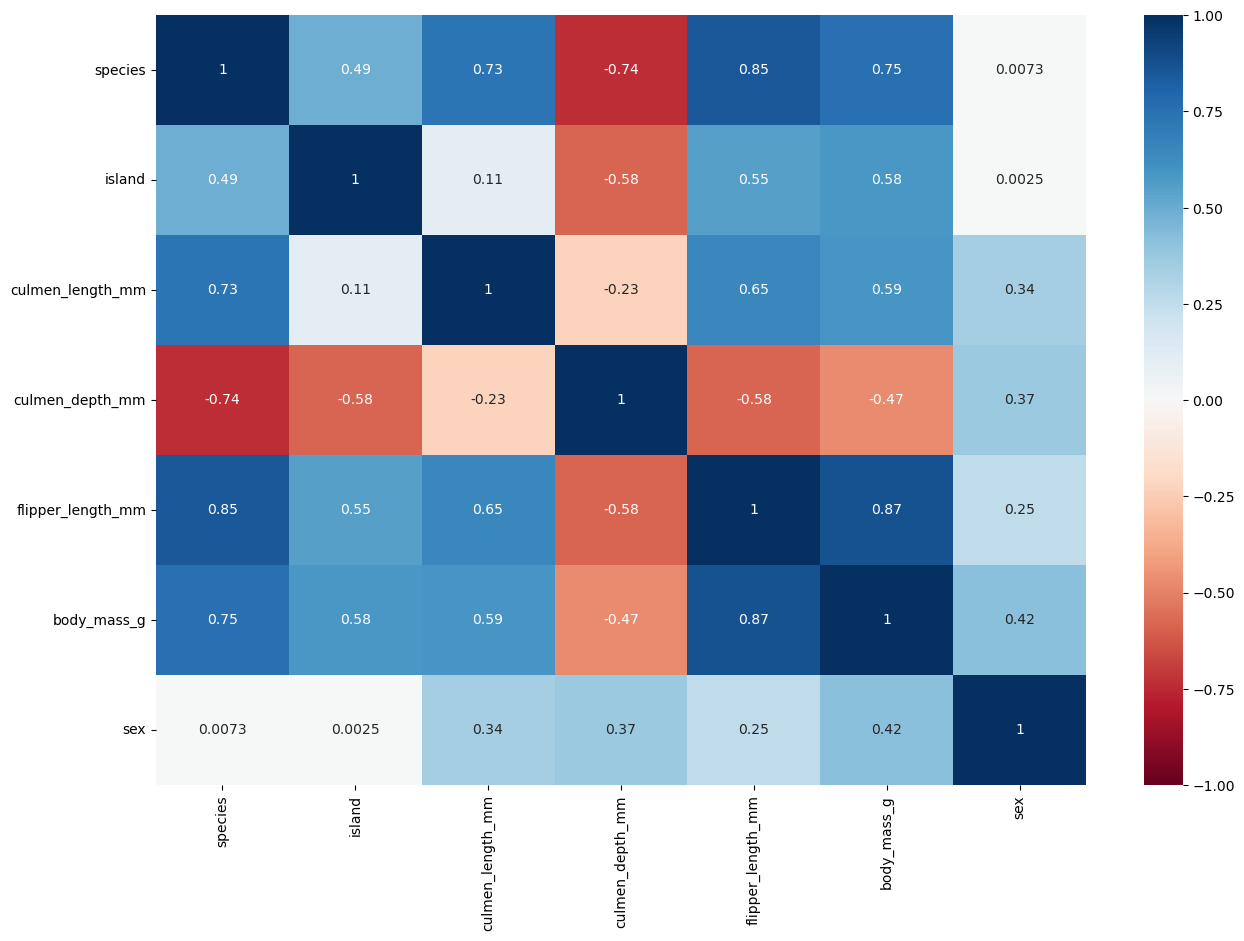

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), cmap='RdBu',
vmin=-1, vmax=1, annot=True)
plt.show()

#culmen depth has the least with -0.74

## Machine Learning

1. Splitting X and y

In [27]:
X = dataset.drop(['species'],axis=1)
y=dataset['species']


2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42)


In [29]:
X_train.shape,X_test.shape

((223, 6), (111, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [30]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier model using the 'entropy' criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Fit the model with training data
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [31]:
# Make predictions using the model with the 'entropy' criterion
y_pred_entropy = clf_entropy.predict(X_test)


In [32]:
from sklearn.metrics import accuracy_score 
print('Model accuracy score with criterion entropy: {0:0.4f}'. format (accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy: 0.9820


[Text(0.4444444444444444, 0.875, 'x[3] <= 206.5\nentropy = 1.534\nsamples = 223\nvalue = [93, 48, 82]'),
 Text(0.2222222222222222, 0.625, 'x[1] <= 42.35\nentropy = 0.967\nsamples = 136\nvalue = [91, 44, 1]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 1.5\nentropy = 0.743\nsamples = 53\nvalue = [8, 44, 1]'),
 Text(0.2222222222222222, 0.125, 'entropy = 0.154\nsamples = 45\nvalue = [1, 44, 0]'),
 Text(0.4444444444444444, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[2] <= 17.55\nentropy = 0.425\nsamples = 87\nvalue = [2, 4, 81]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 81\nvalue = [0, 0, 81]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 46.55\nentropy = 0.918\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.0\nsamples = 4\nva

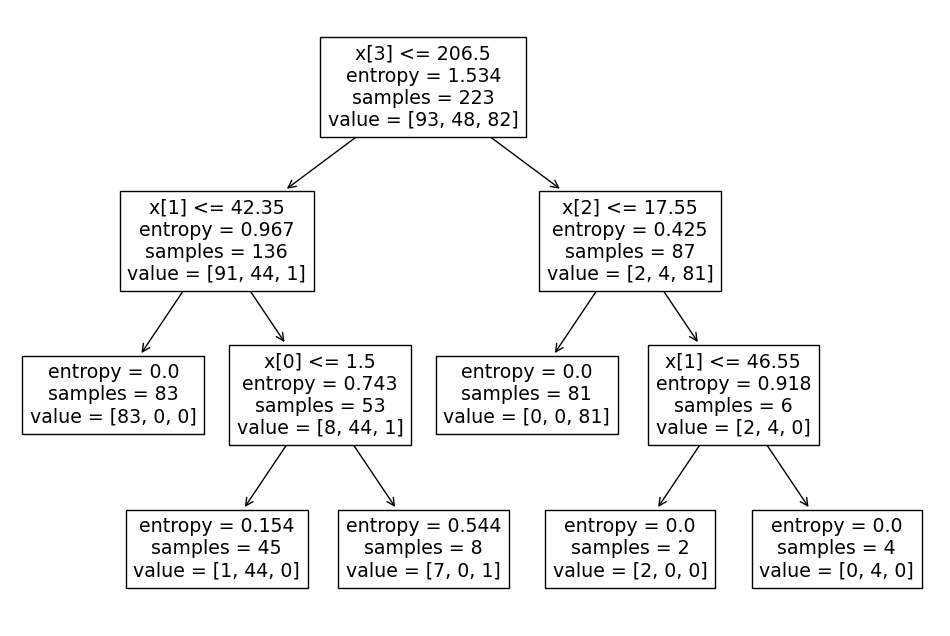

In [33]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_entropy.fit(X_train, y_train))

[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

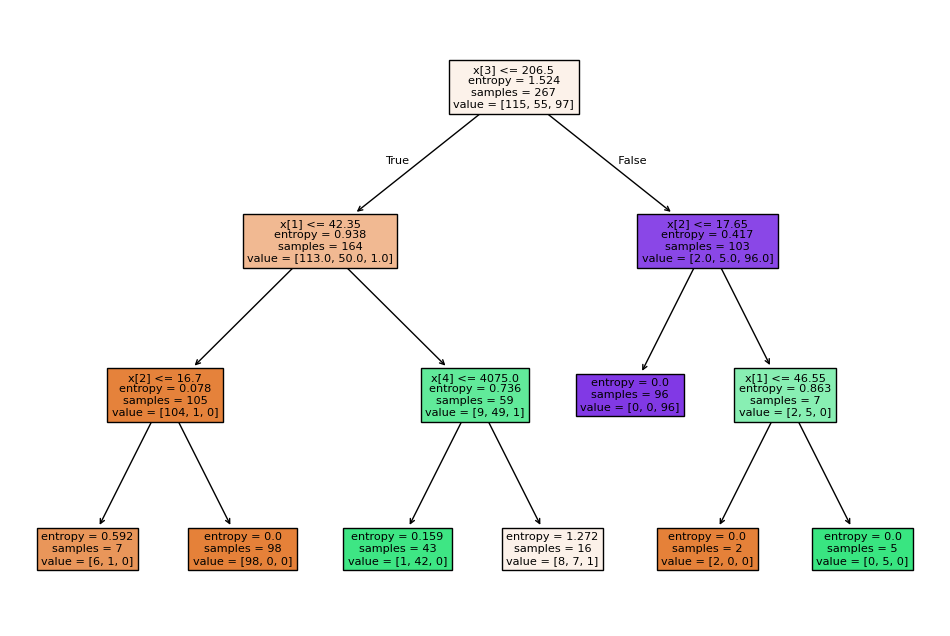

2. Criterion Gini index

In [34]:
# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Membuat model DecisionTreeClassifier dengan kriteria gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Melatih model dengan data training
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [35]:
y_pred_gini = clf_gini.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

# Menghitung dan menampilkan skor akurasi model dengan kriteria gini index
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.9820


In [37]:
print(f"Training set score: {clf_gini.score(X_train, y_train):.4f}")
print(f"Test set score: {clf_gini.score(X_test, y_test):.4f}")

Training set score: 0.9776
Test set score: 0.9820


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.645\nsamples = 223\nvalue = [93, 48, 82]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.448\nsamples = 136\nvalue = [91, 44, 1]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.064\nsamples = 90\nvalue = [87, 3, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 83\nvalue = [83, 0, 0]'),
 Text(0.25, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [4, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.198\nsamples = 46\nvalue = [4, 41, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.046\nsamples = 42\nvalue = [1, 41, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.55\ngini = 0.131\nsamples = 87\nvalue = [2, 4, 81]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 81\nvalue = [0, 0, 81]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 46.55\ngini = 0.444\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsam

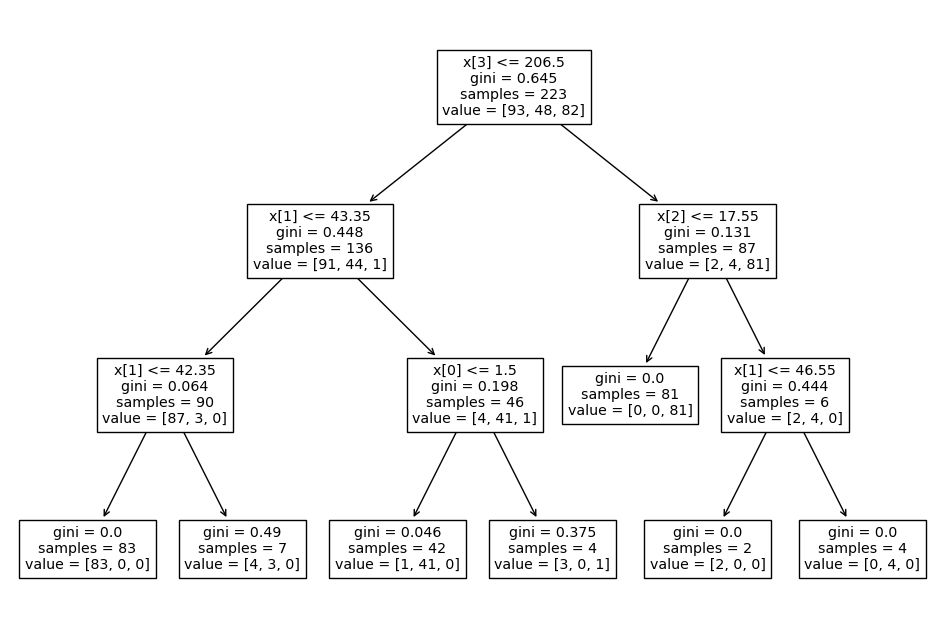

In [38]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

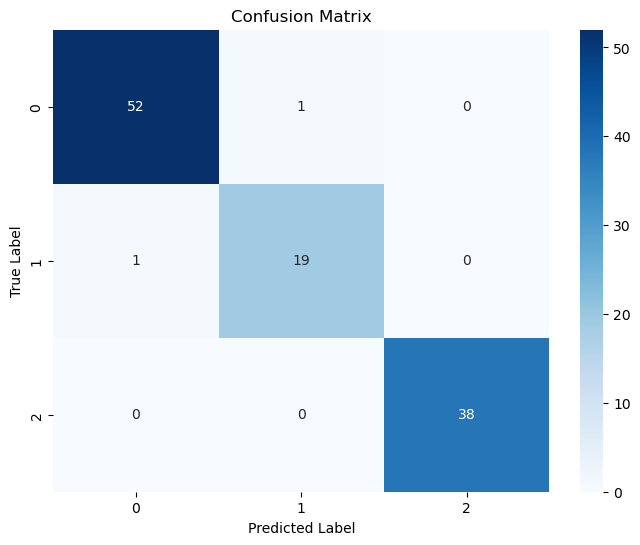

In [39]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        38

    accuracy                           0.98       111
   macro avg       0.98      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111



In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.90      0.95        20
           2       1.00      1.00      1.00        38

    accuracy                           0.98       111
   macro avg       0.99      0.97      0.98       111
weighted avg       0.98      0.98      0.98       111



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [42]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [47]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 97.30%
Confusion Matrix:
[[51  2  0]
 [ 1 19  0]
 [ 0  0 38]]


Confusion Matrix
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score:  1.0


In [48]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.90      0.95      0.93        20
           2       1.00      1.00      1.00        38

    accuracy                           0.97       111
   macro avg       0.96      0.97      0.97       111
weighted avg       0.97      0.97      0.97       111



Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [49]:
print(f"Conclusion: The model achieved an accuracy of {accuracy * 100:.2f}% on the test set.")

Conclusion: The model achieved an accuracy of 97.30% on the test set.


Good Luck :)